In [134]:
from qiskit import QuantumCircuit, transpile, Aer

import utilities_multiples as ut_multiples
import multiples_functions as mult

import matplotlib.pyplot as plt

# Multiples of 3 with 4 qubits as input

In [135]:
K = 3

In [136]:
nqubits_input = 4
N = 2**nqubits_input # Total number of states

In [137]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True)

In [138]:
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

In [139]:
circuit.append(diffuser, range(nqubits_input))

In [140]:
circuit.measure(range(nqubits_input), range(nqubits_input))

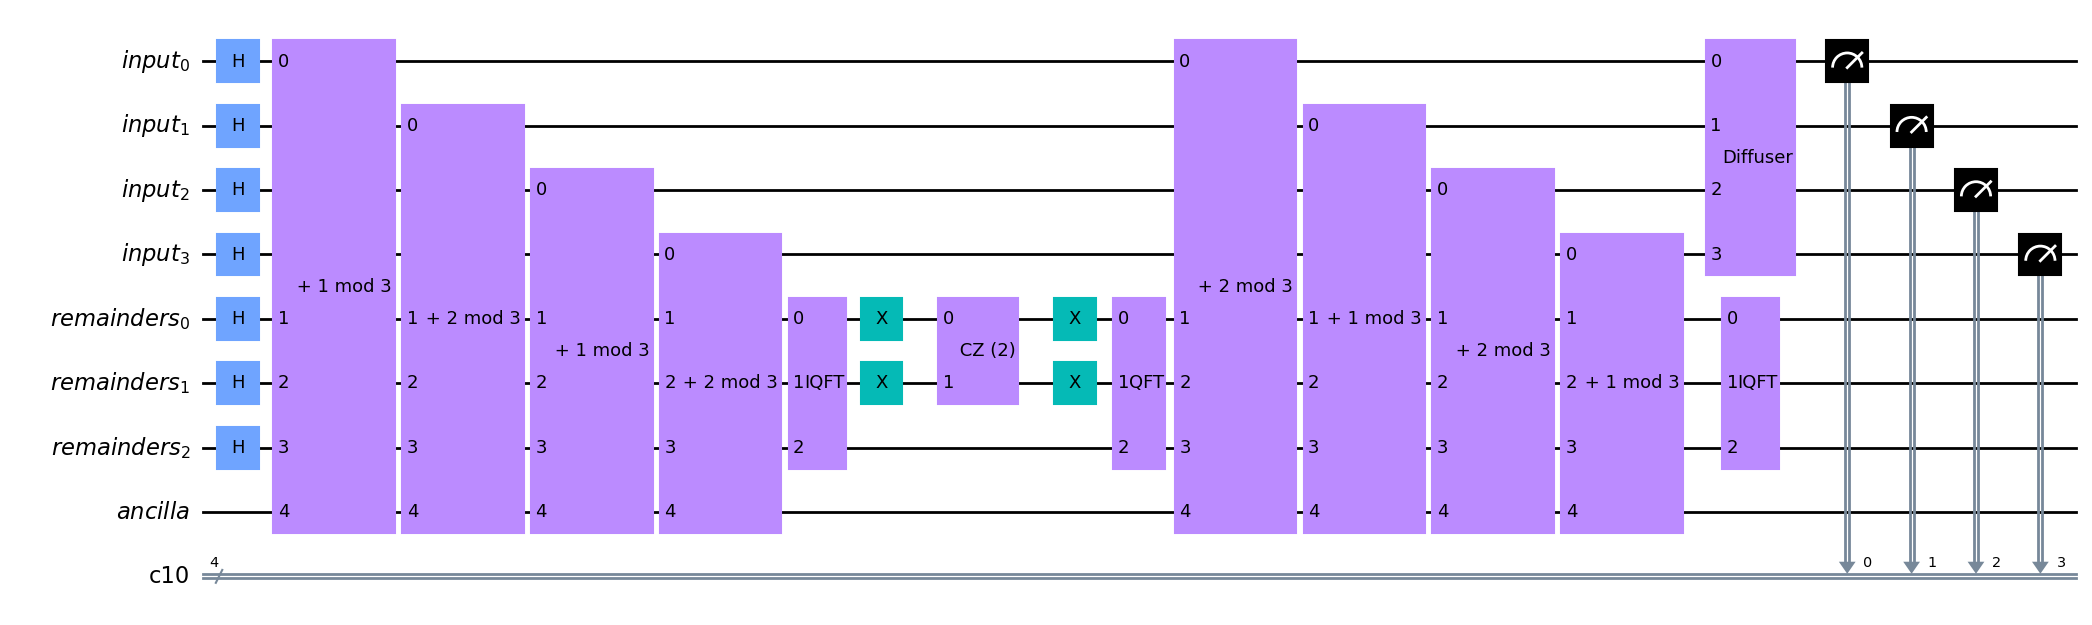

In [141]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [142]:
nshots = 20000

### Choose Backend

In [143]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [144]:
qc_transpiled=transpile(circuit, backend=backend)

In [145]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [146]:
result = job.result()

In [147]:
result.get_counts()

{'0000': 2855,
 '0110': 2741,
 '1111': 2736,
 '1001': 2825,
 '0001': 325,
 '1011': 316,
 '0011': 2786,
 '1100': 2822,
 '1101': 321,
 '0111': 352,
 '0101': 310,
 '0010': 309,
 '0100': 308,
 '1000': 336,
 '1010': 314,
 '1110': 344}

# Plots

In [148]:
x_desired = list(range(0, N, 3))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [149]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=45

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

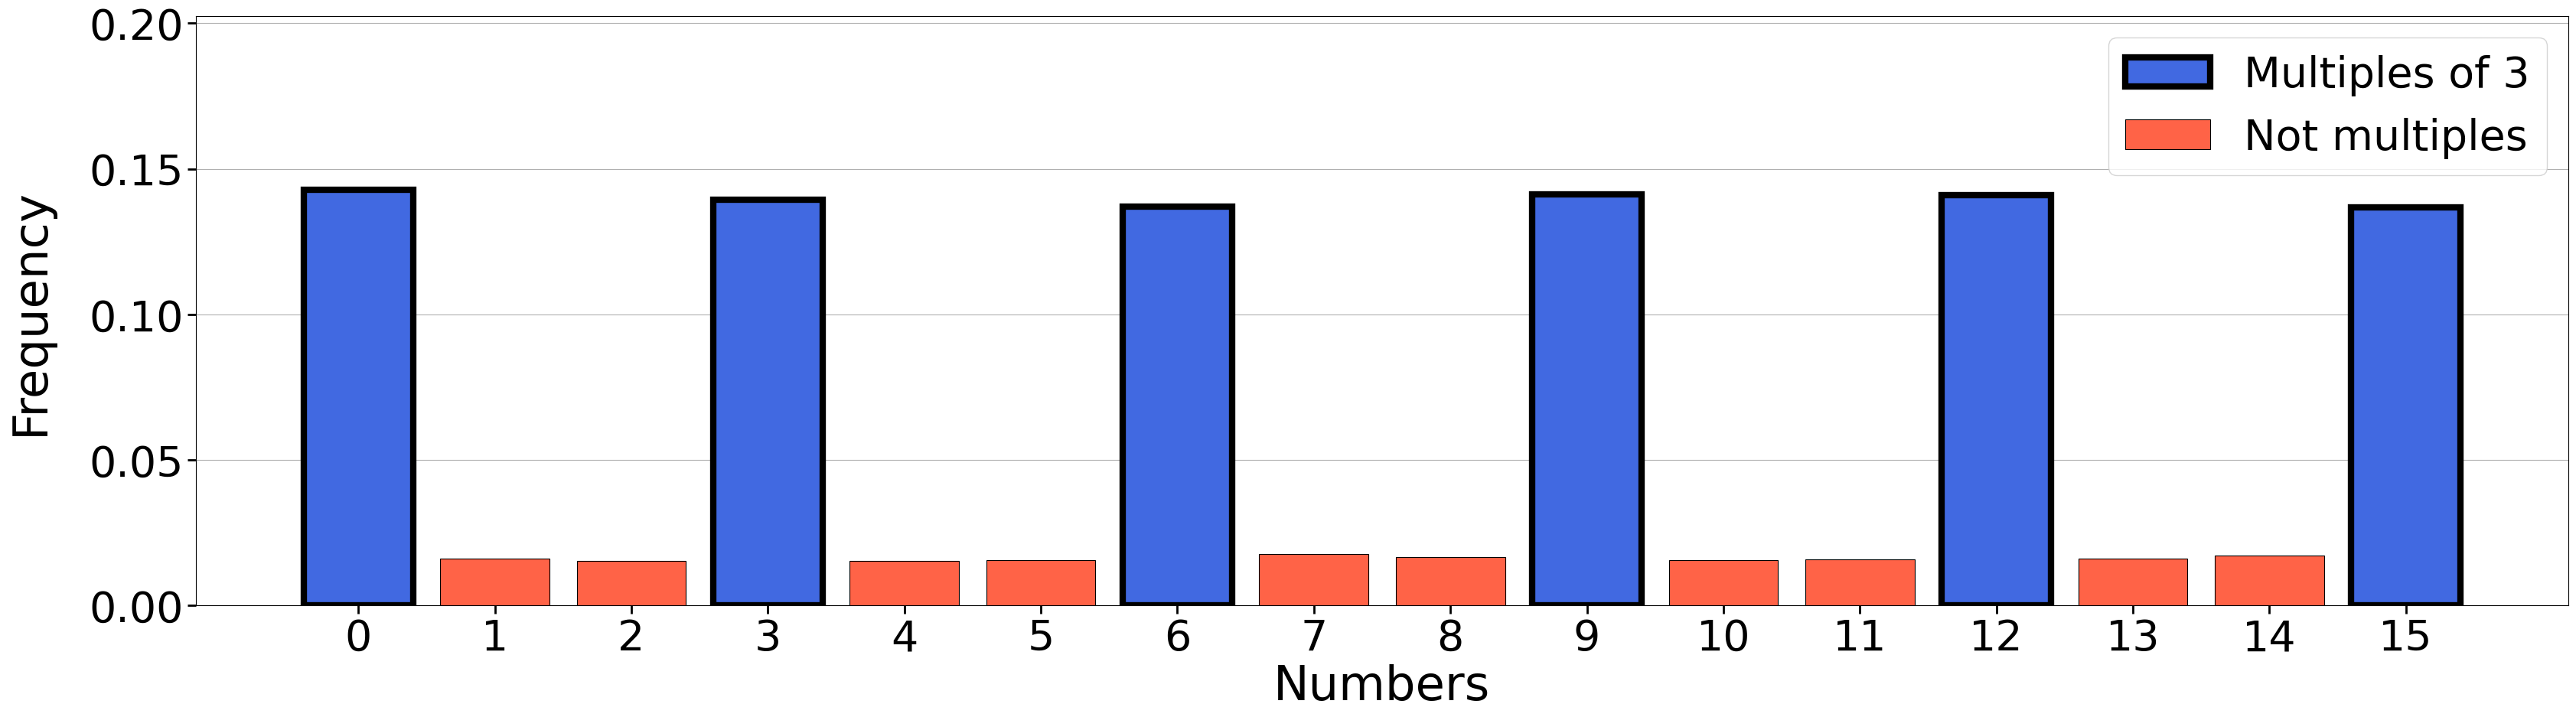

In [150]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%3==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.35*lims[1])
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)

plt.savefig(fname='simulation_%d_K_%d_qubits.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

# Multiples of 5 with 6 qubits as input

In [151]:
K = 5

In [152]:
nqubits_input = 6
N = 2**nqubits_input # Total number of states

In [153]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True)

In [154]:
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

In [155]:
circuit.append(diffuser, range(nqubits_input))

In [156]:
circuit.measure(range(nqubits_input), range(nqubits_input))

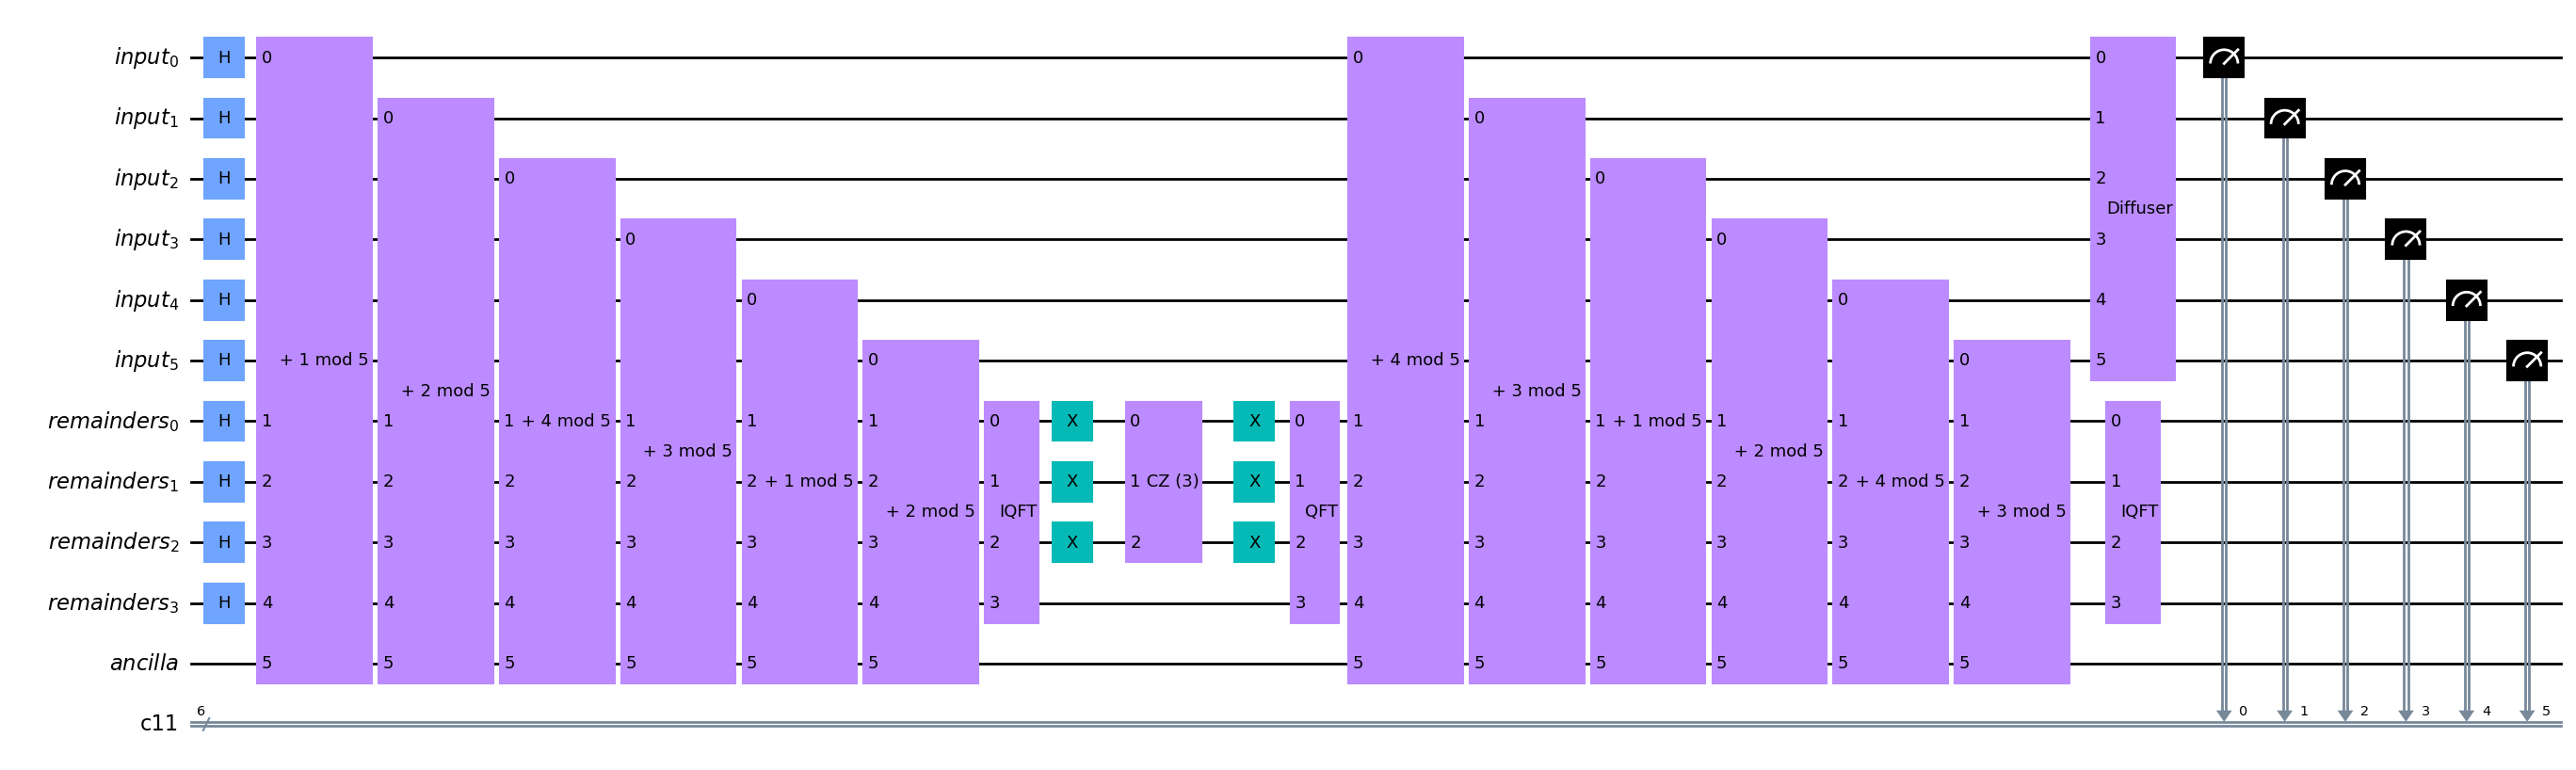

In [157]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [158]:
nshots = 20000

### Choose Backend

In [159]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [160]:
qc_transpiled=transpile(circuit, backend=backend)

In [161]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [162]:
result = job.result()

In [163]:
result.get_counts()

{'000100': 18,
 '110011': 14,
 '101101': 1470,
 '011110': 1425,
 '100100': 8,
 '001101': 10,
 '111100': 1543,
 '000000': 1453,
 '110111': 1404,
 '101000': 1523,
 '010100': 1490,
 '100001': 9,
 '111111': 8,
 '001010': 1513,
 '111010': 8,
 '100110': 18,
 '001111': 1530,
 '111101': 7,
 '001100': 18,
 '100011': 1515,
 '011001': 1443,
 '101110': 12,
 '110010': 1566,
 '000101': 1548,
 '000010': 18,
 '101011': 16,
 '110101': 9,
 '001000': 12,
 '011100': 15,
 '000001': 8,
 '110110': 12,
 '101010': 10,
 '110001': 9,
 '000110': 13,
 '101111': 5,
 '011111': 14,
 '100101': 11,
 '001110': 11,
 '111011': 10,
 '111000': 13,
 '100111': 5,
 '010101': 14,
 '011101': 10,
 '111001': 14,
 '100000': 10,
 '000111': 13,
 '110000': 12,
 '011011': 12,
 '010001': 9,
 '001001': 8,
 '110100': 13,
 '101100': 14,
 '000011': 11,
 '101001': 8,
 '011010': 13,
 '010000': 10,
 '010011': 14,
 '100010': 10,
 '001011': 7,
 '111110': 15,
 '010010': 9,
 '010111': 8,
 '011000': 12,
 '010110': 10}

# Plots

In [164]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [165]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=45

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

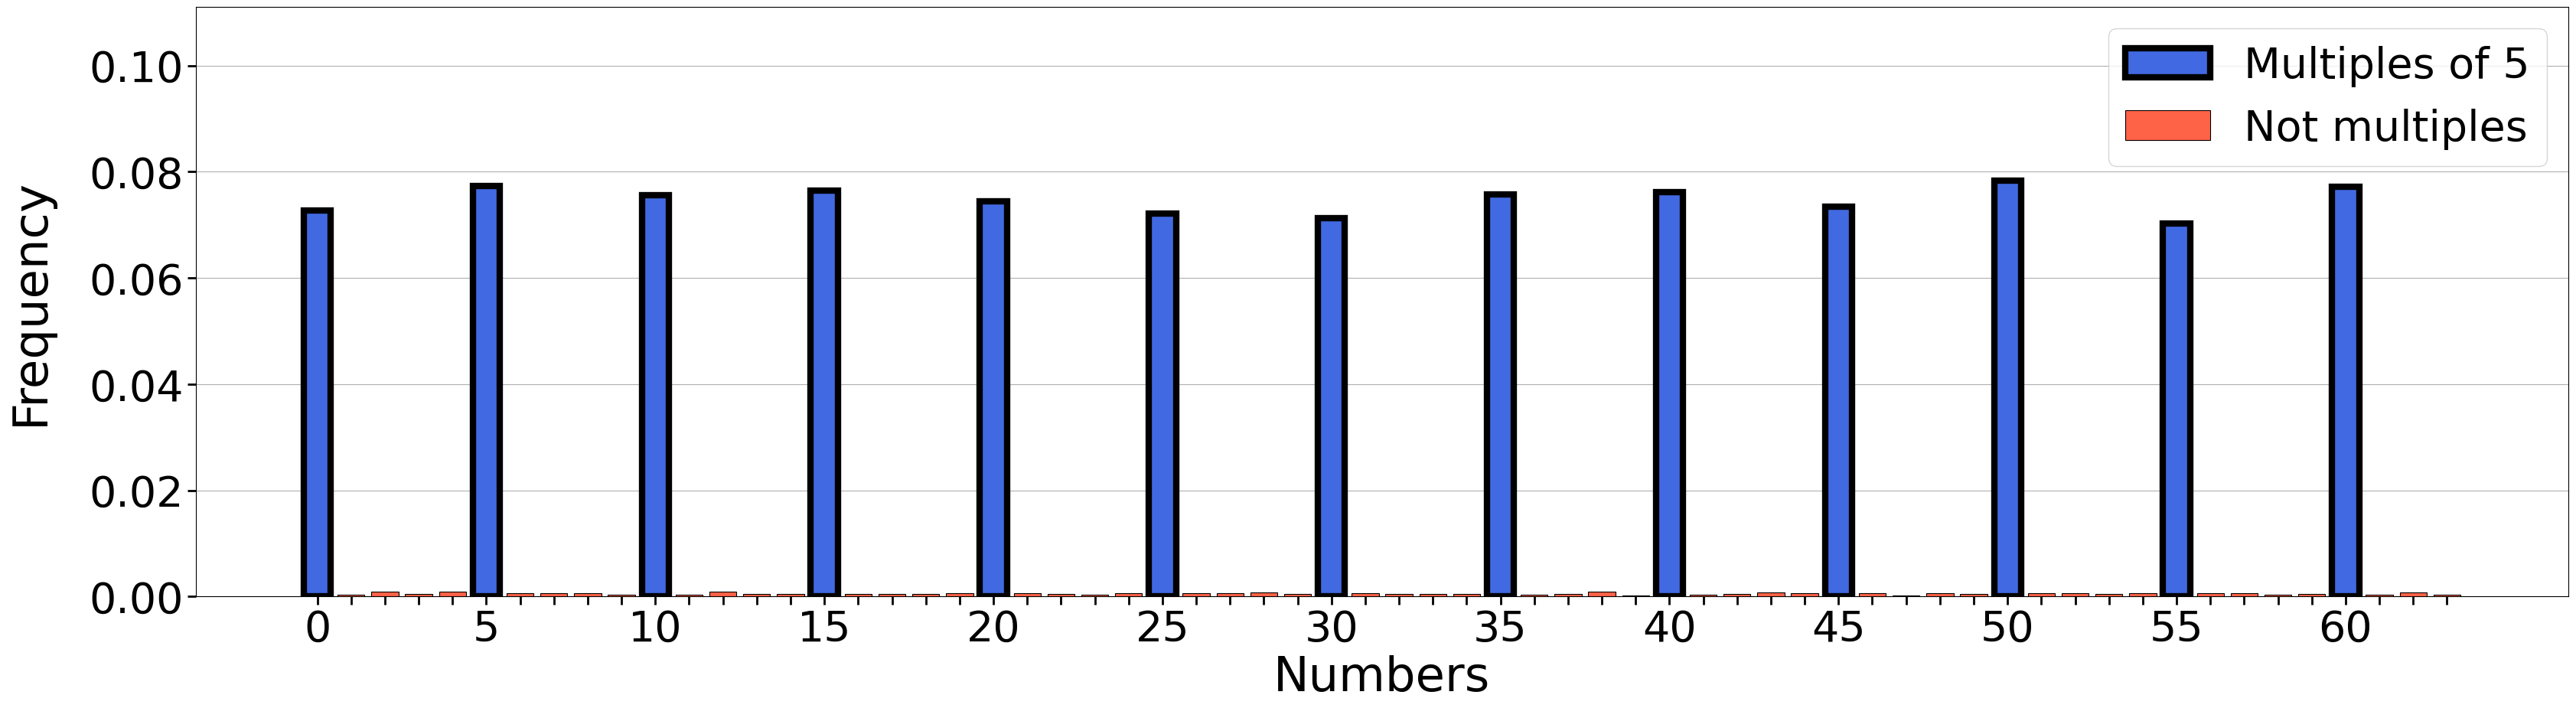

In [166]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

ax.set_xticklabels([str(a) if a%K==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(lims[0], 1.35*lims[1])
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)

plt.savefig(fname='simulation_%d_K_%d_qubits.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

# Multiples of 17 with 5 qubits as input

In [167]:
K = 17

In [168]:
nqubits_input = 5
N = 2**nqubits_input # Total number of states

In [169]:
circuit = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=True)
diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)
circuit.append(diffuser, range(nqubits_input))
circuit.measure(range(nqubits_input), range(nqubits_input))

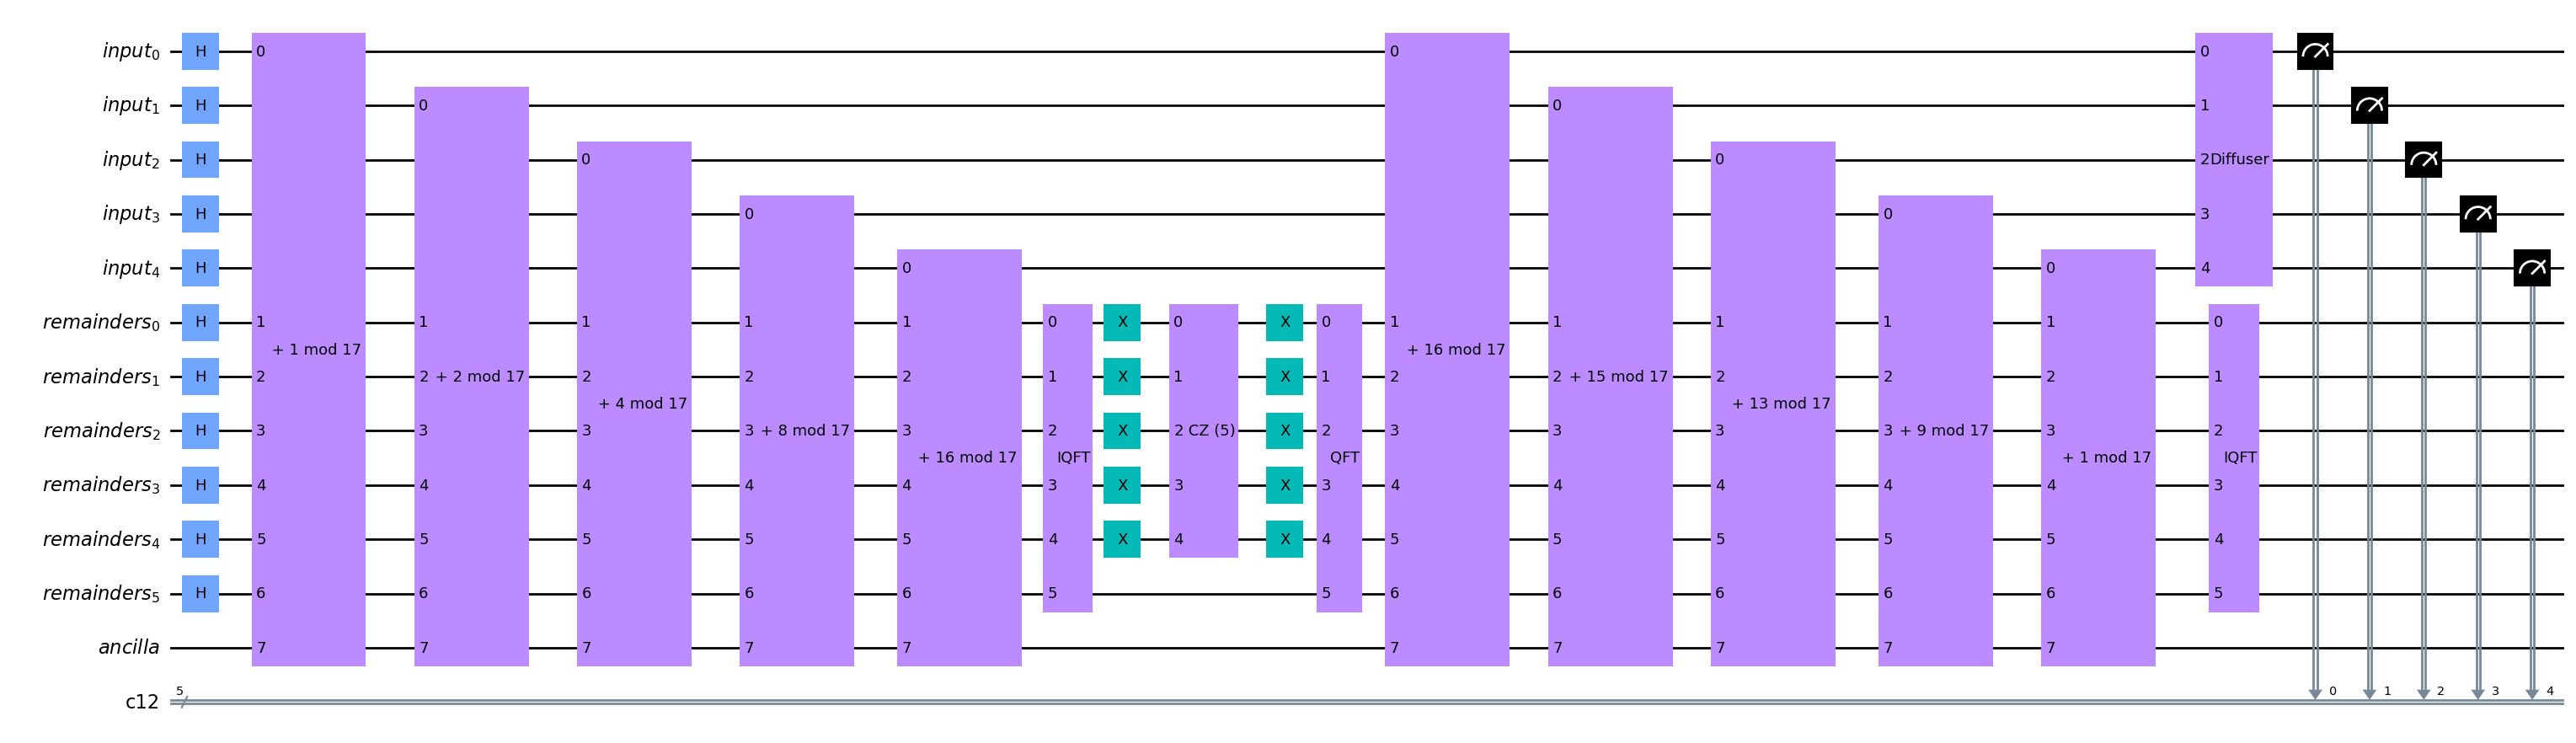

In [170]:
circuit.draw(fold=-1, output='mpl')

# Simulation of circuit

In [171]:
nshots = 20000

### Choose Backend

In [172]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [173]:
qc_transpiled=transpile(circuit, backend=backend)

In [174]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [175]:
result = job.result()

# Plots

In [178]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [179]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=45

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

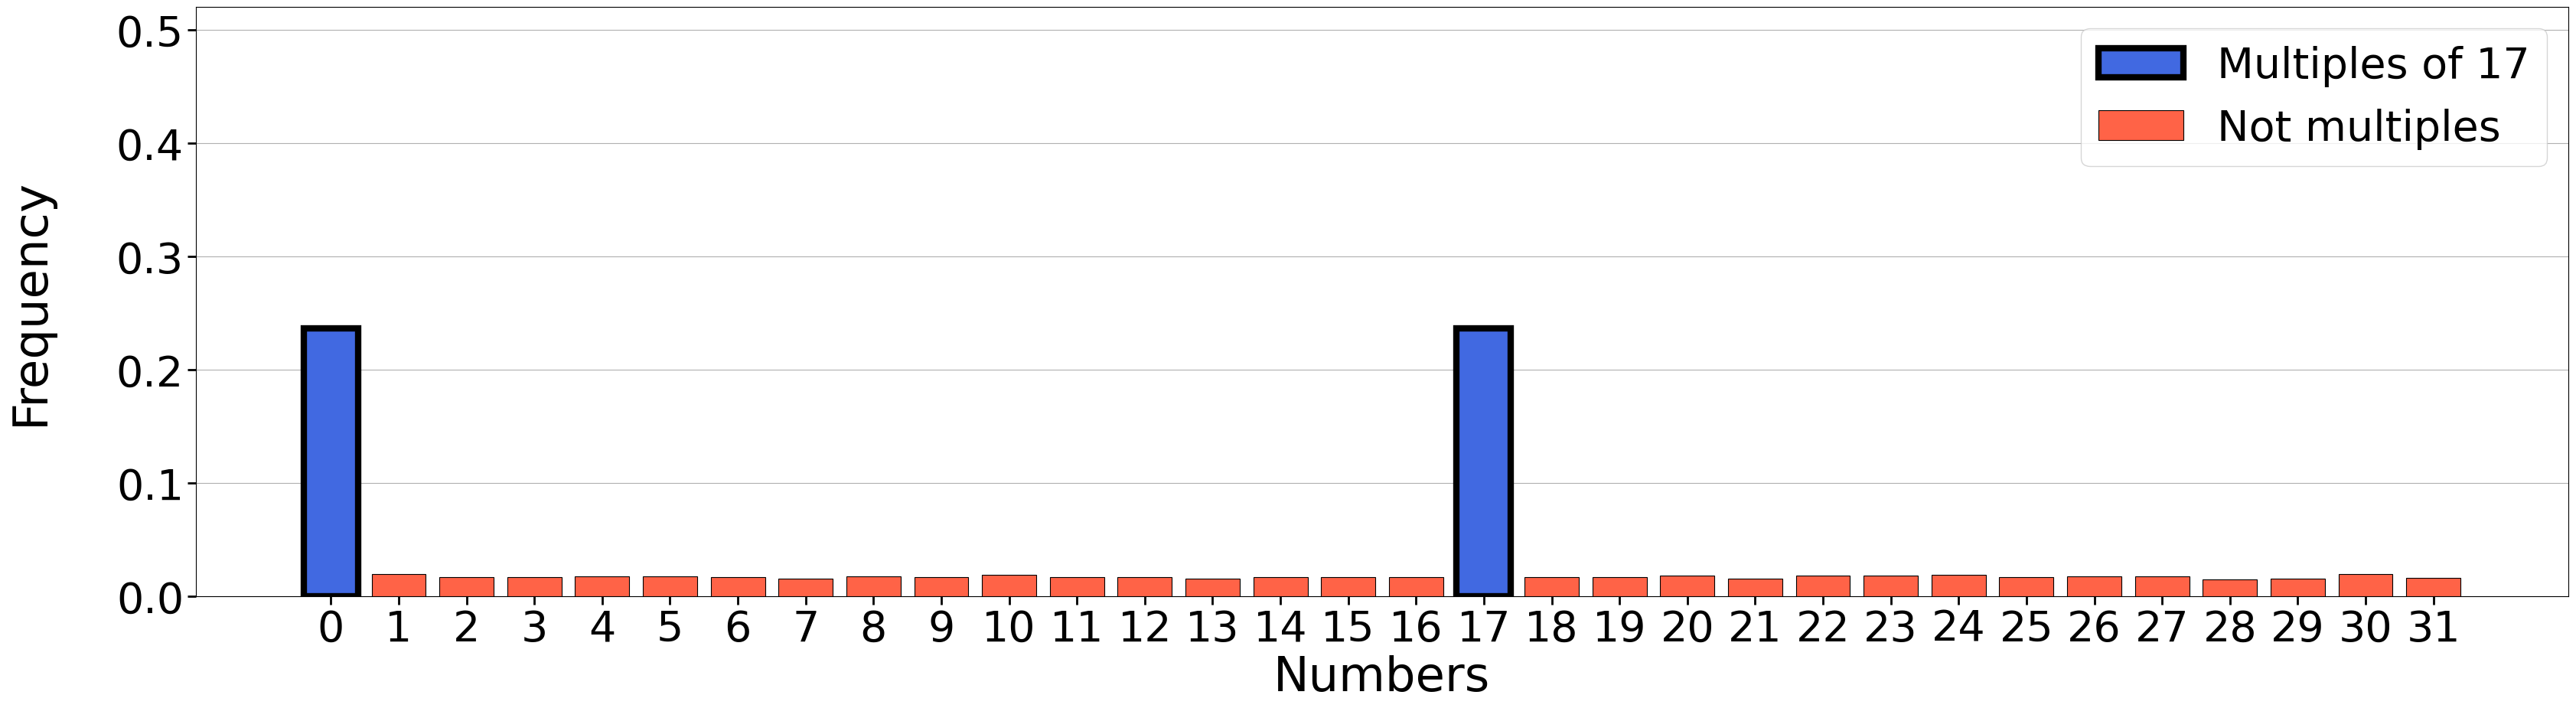

In [180]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%K==0 or a%5==0 else ' ' for a in range(N)])

# lims = ax.get_ylim()

# ax.set_ylim(lims[0], 1.35*lims[1])

ax.set_ylim(0, 0.52)
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)

plt.savefig(fname='simulation_%d_K_%d_qubits_one_rep.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)

## Repeating twice

In [181]:
circuit = QuantumCircuit(12, nqubits_input)

circuit.h(range(nqubits_input))

oracle = mult.oracle_multiples(k=K, nqubits_input=nqubits_input, init_H=False)

circuit.append(oracle, range(12), range(nqubits_input))

diffuser = ut_multiples.grover_diffuser(nqubits=nqubits_input)

circuit.append(diffuser, range(nqubits_input))

circuit.append(oracle, range(12), range(nqubits_input))

circuit.append(diffuser, range(nqubits_input))

In [182]:
circuit.measure(range(nqubits_input), range(nqubits_input))

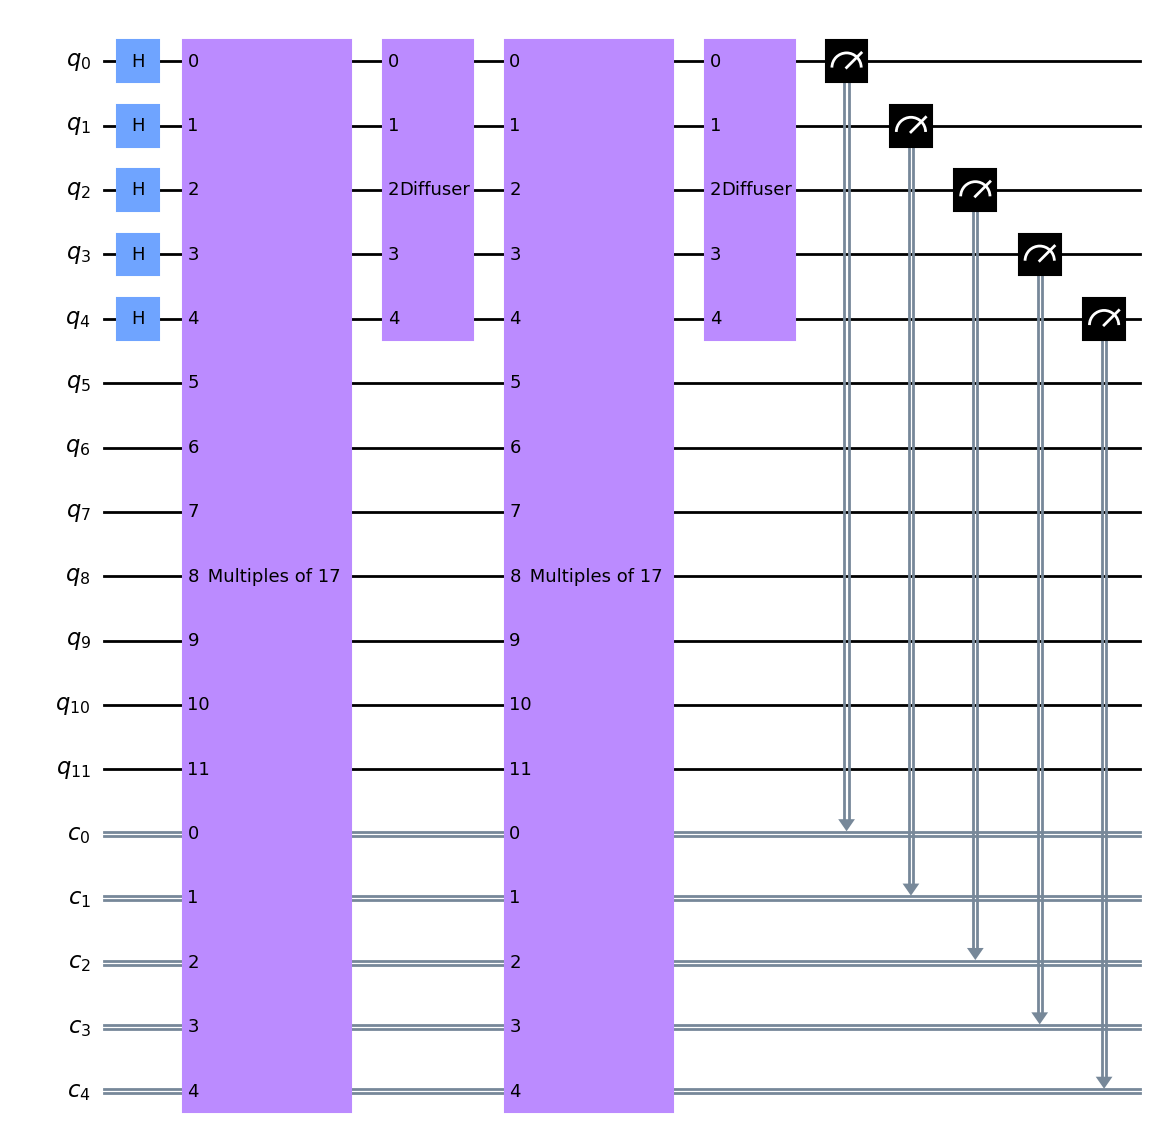

In [183]:
circuit.draw('mpl')

## Simulation

In [184]:
nshots = 20000

### Choose Backend

In [185]:
backend = Aer.get_backend('aer_simulator_statevector')

### Transpile and execute circuit

In [186]:
qc_transpiled=transpile(circuit, backend=backend)

In [187]:
job= backend.run(qc_transpiled, shots=nshots, memory=True)

## Results

In [188]:
result = job.result()

# Plots

In [189]:
x_desired = list(range(0, N, K))
x_undesired = [a for a in range(N) if a not in x_desired]

y_desired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_desired]
y_undesired = [result.get_counts().get(ut_multiples.to_binary(a, nqubits_input), 0) for a in x_undesired]

#### Information for Plot

In [190]:
xlabel='Numbers'
ylabel='Frequency'

edgecolor='k'

figsize_=(40,10)

legend_names=['Multiples of %d'%K,'Not multiples']

fontsize=45

# Label and ticks

yticks_size=fontsize-5
xticks_size=fontsize-5

xlabel_size=fontsize
ylabel_size = fontsize

ylabel_position=(-0.06, 0.5)

## Plotting

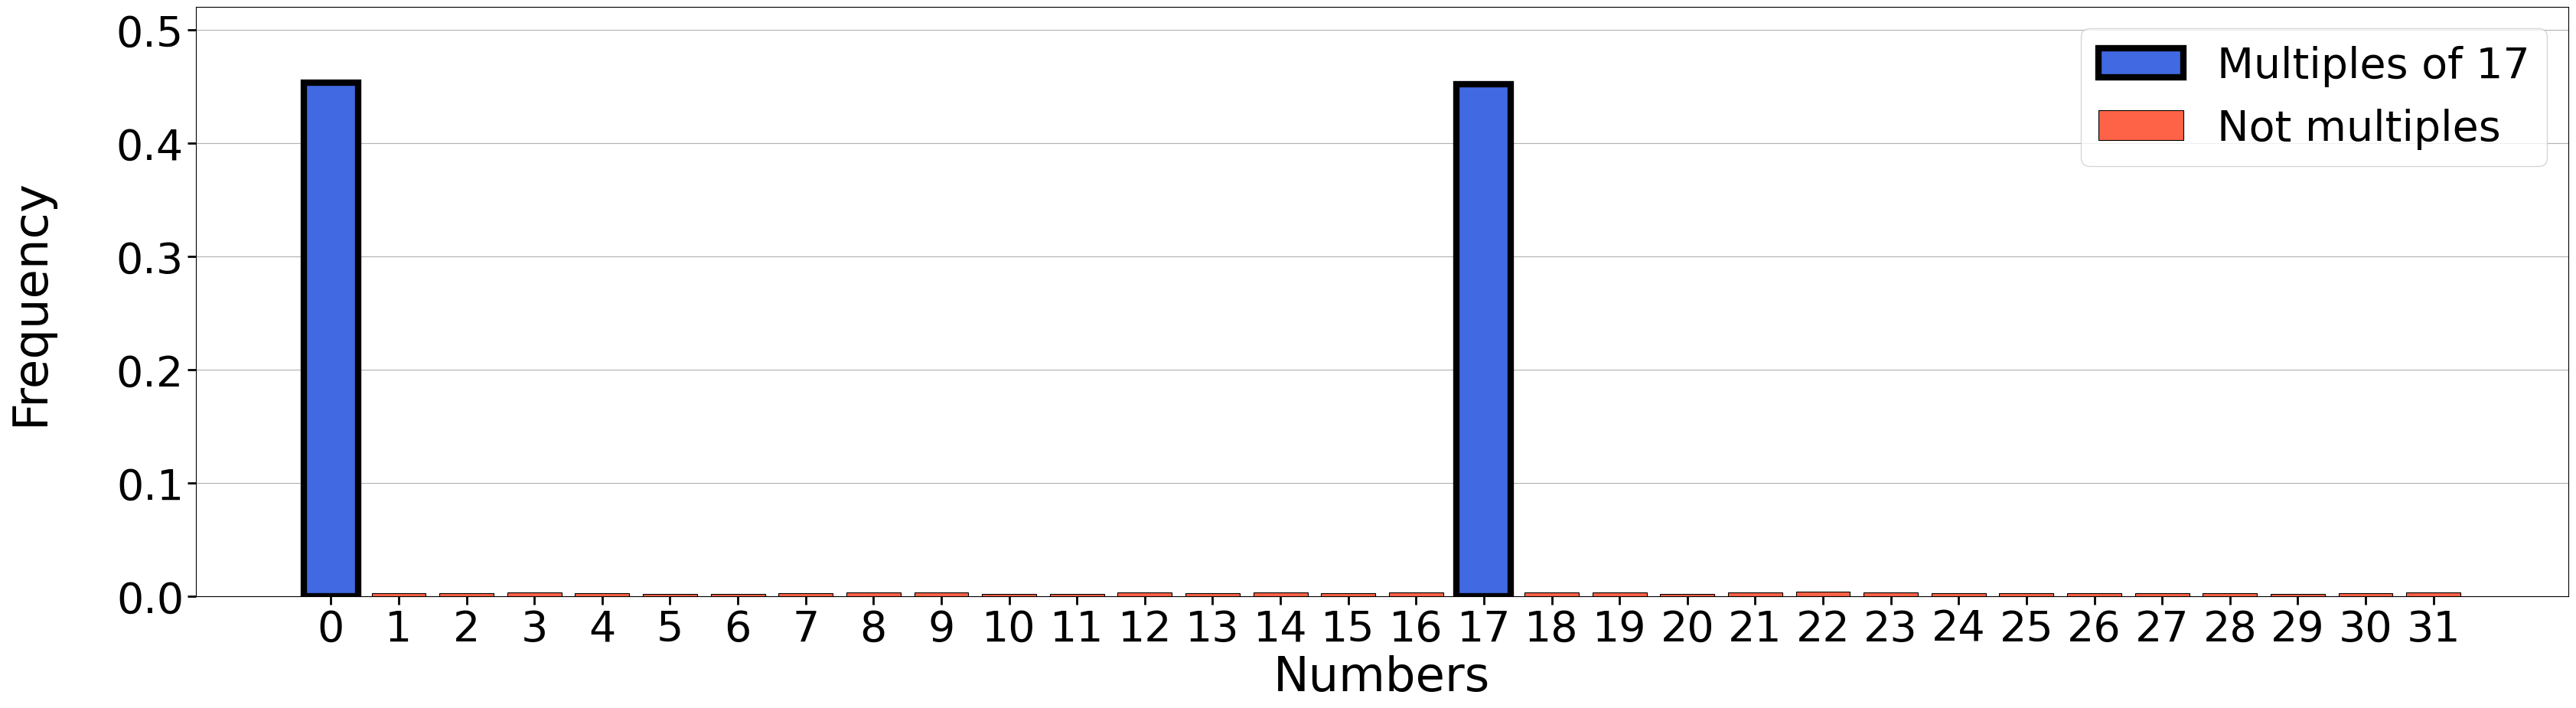

In [191]:
fig, ax = plt.subplots(1, 1, figsize=figsize_)


ax.bar(x_desired, [y_element/nshots for y_element in y_desired], zorder=3,
       edgecolor='k', label=legend_names[0], color = 'royalblue', linewidth=6)
ax.bar(x_undesired, [y_element/nshots for y_element in y_undesired], zorder=3,
       edgecolor='k', label=legend_names[1], color='tomato', linewidth=0.8)

ax.set_xticks(list(range(N)))

ax.tick_params(axis='x', labelsize=xticks_size)
ax.tick_params(axis='y', labelsize=yticks_size)

ax.set_xlabel(xlabel, fontsize=xlabel_size)
ax.set_ylabel(ylabel, fontsize=ylabel_size)


ax.yaxis.set_label_coords(ylabel_position[0], ylabel_position[1])

ax.grid(axis='y', zorder=0)

# ax.set_xticklabels([str(a) if a%K==0 or a%5==0 else ' ' for a in range(N)])

# highest_frequency = max(y_desired)/nshots

lims = ax.get_ylim()

ax.set_ylim(0, 0.52)
    

ax.legend(fontsize=fontsize-5)

ax.tick_params(width=2, size=8)

plt.savefig(fname='simulation_%d_K_%d_qubits_two_reps.png'%(K, nqubits_input), bbox_inches='tight', dpi=200)